In [2]:
# Read into a dataframe a CSV dataset with 10 example offices 
# described by 5 features (4 descriptive features: Size, Floor, BroadbandRate, EnergyRating;
# the target feature: RentalPrice).

# Library Imports.
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


# Allows plots to appear directly in the notebook.
%matplotlib inline

from patsy import dmatrices
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score 

In [3]:
# Read a CSV dataset with 10 example offices into a dataframe.
# The data is described by 5 features (4 descriptive features: Size, Floor, BroadbandRate, EnergyRating;
# the target feature: RentalPrice).


# Read csv file into a dataframe.
df = pd.read_csv('CreditRisk_Clean_1-3_NewFeatures.csv')
df.head(10)

,RiskPerformance,ExternalRiskEstimate,MSinceOldestTradeOpen,MSinceMostRecentTradeOpen,AverageMInFile,NumSatisfactoryTrades,NumTrades60Ever2DerogPubRec,NumTrades90Ever2DerogPubRec,PercentTradesNeverDelq,MSinceMostRecentDelq,...,NetFractionInstallBurden,NumRevolvingTradesWBalance,NumInstallTradesWBalance,NumBank2NatlTradesWHighUtilization,PercentTradesWBalance,PercentRiskPerformance,IncorrectRiskPerformancePercentage,IncorrectTotalTrades,IncorrectRiskPerformanceNum,Avrg60And90Days
0,Bad,61,246,20,95,18,2,2,86,11,...,0,5,1,2,88,3.333333,Correct,Correct,Correct,2.0
1,Good,72,156,2,53,16,2,0,89,50,...,50,2,2,1,44,1.298701,Incorrect,Correct,Correct,1.0
2,Bad,73,132,9,47,4,0,0,100,0,...,0,1,1,1,100,0.230415,Incorrect,Correct,Incorrect,0.0
3,Good,62,21,12,17,4,0,0,100,0,...,83,1,2,1,75,0.230415,Correct,Correct,Correct,0.0
4,Good,85,320,17,104,18,0,0,94,46,...,75,1,2,0,27,0.359712,Incorrect,Correct,Correct,0.0
5,Good,89,150,19,69,12,0,0,100,0,...,55,1,2,0,43,0.230415,Correct,Correct,Correct,0.0
6,Good,86,337,1,102,21,0,0,100,0,...,100,2,4,0,50,0.230415,Correct,Correct,Correct,0.0
7,Good,67,160,4,49,27,0,0,97,48,...,76,5,2,0,70,0.359712,Incorrect,Correct,Correct,0.0
8,Bad,70,0,11,36,7,0,0,88,20,...,100,1,2,0,75,0.359712,Correct,Correct,Correct,0.0
9,Bad,74,172,0,82,14,0,0,81,5,...,0,2,1,0,43,0.359712,Correct,Correct,Correct,0.0


In [4]:
# find out how many rows to calculate percentages when creating trainning and testing datasets
len(df.index)

937

# (1.1) Randomly shuffle the rows of dataset and split the dataset into two datasets: 70% training and 30% test. Keep the test set aside.

In [5]:
# Random shuffling of the rows in the data frame - so as to be fair in our selection of the trainning and test data

df = df.reindex(np.random.permutation(df.index))
df.head(10)

,RiskPerformance,ExternalRiskEstimate,MSinceOldestTradeOpen,MSinceMostRecentTradeOpen,AverageMInFile,NumSatisfactoryTrades,NumTrades60Ever2DerogPubRec,NumTrades90Ever2DerogPubRec,PercentTradesNeverDelq,MSinceMostRecentDelq,...,NetFractionInstallBurden,NumRevolvingTradesWBalance,NumInstallTradesWBalance,NumBank2NatlTradesWHighUtilization,PercentTradesWBalance,PercentRiskPerformance,IncorrectRiskPerformancePercentage,IncorrectTotalTrades,IncorrectRiskPerformanceNum,Avrg60And90Days
238,Good,64,223,3,77,21,0,0,100,0,...,0,6,1,3,100,0.230415,Correct,Correct,Correct,0.0
251,Good,79,196,3,50,13,0,0,100,0,...,0,2,1,2,60,0.230415,Correct,Correct,Correct,0.0
159,Bad,71,132,2,53,10,1,0,85,23,...,85,4,2,1,100,1.298701,Correct,Correct,Correct,0.5
398,Good,86,307,24,131,14,0,0,100,0,...,0,2,0,0,29,0.230415,Correct,Correct,Correct,0.0
310,Good,70,335,3,105,35,2,2,87,34,...,6,10,3,1,88,3.333333,Incorrect,Correct,Correct,2.0
413,Good,63,211,13,76,15,2,2,74,9,...,0,1,0,0,14,1.351351,Incorrect,Correct,Correct,2.0
550,Bad,56,153,18,80,17,0,0,95,1,...,0,2,1,2,75,0.359712,Correct,Correct,Correct,0.0
711,Good,81,302,2,86,37,0,0,95,59,...,69,3,5,0,50,0.359712,Incorrect,Correct,Correct,0.0
16,Bad,74,99,8,51,16,0,0,100,0,...,0,5,3,1,89,0.230415,Incorrect,Correct,Incorrect,0.0
569,Bad,58,71,8,36,9,0,0,78,2,...,82,1,2,1,100,0.359712,Correct,Correct,Incorrect,0.0


In [6]:
# create variable to obtain what the 70% of the data set is
seventy_percent = round(len(df.index)/100*70)

# Create dataframe with the first 70% of the data and show the first 10 rows - this dataframe will be the trainning data
df_train = df[0:seventy_percent]
df_train.head(10)

,RiskPerformance,ExternalRiskEstimate,MSinceOldestTradeOpen,MSinceMostRecentTradeOpen,AverageMInFile,NumSatisfactoryTrades,NumTrades60Ever2DerogPubRec,NumTrades90Ever2DerogPubRec,PercentTradesNeverDelq,MSinceMostRecentDelq,...,NetFractionInstallBurden,NumRevolvingTradesWBalance,NumInstallTradesWBalance,NumBank2NatlTradesWHighUtilization,PercentTradesWBalance,PercentRiskPerformance,IncorrectRiskPerformancePercentage,IncorrectTotalTrades,IncorrectRiskPerformanceNum,Avrg60And90Days
238,Good,64,223,3,77,21,0,0,100,0,...,0,6,1,3,100,0.230415,Correct,Correct,Correct,0.0
251,Good,79,196,3,50,13,0,0,100,0,...,0,2,1,2,60,0.230415,Correct,Correct,Correct,0.0
159,Bad,71,132,2,53,10,1,0,85,23,...,85,4,2,1,100,1.298701,Correct,Correct,Correct,0.5
398,Good,86,307,24,131,14,0,0,100,0,...,0,2,0,0,29,0.230415,Correct,Correct,Correct,0.0
310,Good,70,335,3,105,35,2,2,87,34,...,6,10,3,1,88,3.333333,Incorrect,Correct,Correct,2.0
413,Good,63,211,13,76,15,2,2,74,9,...,0,1,0,0,14,1.351351,Incorrect,Correct,Correct,2.0
550,Bad,56,153,18,80,17,0,0,95,1,...,0,2,1,2,75,0.359712,Correct,Correct,Correct,0.0
711,Good,81,302,2,86,37,0,0,95,59,...,69,3,5,0,50,0.359712,Incorrect,Correct,Correct,0.0
16,Bad,74,99,8,51,16,0,0,100,0,...,0,5,3,1,89,0.230415,Incorrect,Correct,Incorrect,0.0
569,Bad,58,71,8,36,9,0,0,78,2,...,82,1,2,1,100,0.359712,Correct,Correct,Incorrect,0.0


In [7]:
# double check that it is infact 70 percent
print(len(df_train.index) == seventy_percent)
print(len(df_train.index))

True
656


In [8]:
# Create df_test as the remaining 30% of the data frame to apply the testing of the model

df_test = df[seventy_percent:]
print(len(df_test))
df_test.head(10)

281


,RiskPerformance,ExternalRiskEstimate,MSinceOldestTradeOpen,MSinceMostRecentTradeOpen,AverageMInFile,NumSatisfactoryTrades,NumTrades60Ever2DerogPubRec,NumTrades90Ever2DerogPubRec,PercentTradesNeverDelq,MSinceMostRecentDelq,...,NetFractionInstallBurden,NumRevolvingTradesWBalance,NumInstallTradesWBalance,NumBank2NatlTradesWHighUtilization,PercentTradesWBalance,PercentRiskPerformance,IncorrectRiskPerformancePercentage,IncorrectTotalTrades,IncorrectRiskPerformanceNum,Avrg60And90Days
536,Bad,59,179,11,40,28,0,0,100,0,...,65,8,1,4,75,0.230415,Incorrect,Correct,Incorrect,0.0
45,Bad,52,195,3,66,20,2,2,75,1,...,65,6,3,3,90,1.351351,Correct,Correct,Correct,2.0
805,Bad,71,208,3,62,28,1,1,97,40,...,97,4,3,0,50,1.351351,Correct,Correct,Correct,1.0
675,Bad,68,319,2,127,26,0,0,93,20,...,47,9,4,2,62,0.359712,Correct,Correct,Correct,0.0
825,Bad,59,123,4,66,32,1,1,88,6,...,76,5,4,2,56,0.359712,Correct,Correct,Incorrect,1.0
495,Bad,57,206,1,84,53,1,1,94,61,...,97,11,3,3,75,0.359712,Correct,Correct,Correct,1.0
537,Bad,66,133,6,77,23,0,0,100,0,...,94,6,2,6,100,0.230415,Incorrect,Correct,Correct,0.0
81,Good,88,140,10,85,9,0,0,100,0,...,0,3,0,0,50,0.230415,Correct,Correct,Correct,0.0
902,Bad,66,185,8,42,10,0,0,100,0,...,86,4,2,2,86,0.230415,Incorrect,Correct,Incorrect,0.0
840,Bad,72,132,8,66,21,0,0,95,17,...,83,7,3,0,83,0.359712,Correct,Correct,Correct,0.0


In [9]:
# Ensure that the two dataframes created are indeed 70% and 30% and add up to the total of rows
# 100% of the dataframe was 937 rows - above shows 656 rows for the 70% df and 281 rows for the 30% df totaling 937 rows
# or 100%

print((seventy_percent) + round(len(df.index)/100*30))
print(len(df_test) + len(df_train))

937
937


# - (1.2) On the training set:
## - Plot the correlations between all the continuous features. Discuss what you see in these plots.

In [10]:
# Check which are the continuous features
df_train.dtypes

RiskPerformance                        object
ExternalRiskEstimate                    int64
MSinceOldestTradeOpen                   int64
MSinceMostRecentTradeOpen               int64
AverageMInFile                          int64
NumSatisfactoryTrades                   int64
NumTrades60Ever2DerogPubRec             int64
NumTrades90Ever2DerogPubRec             int64
PercentTradesNeverDelq                  int64
MSinceMostRecentDelq                    int64
MaxDelq2PublicRecLast12M                int64
MaxDelqEver                             int64
NumTotalTrades                          int64
NumTradesOpeninLast12M                  int64
PercentInstallTrades                    int64
MSinceMostRecentInqexcl7days            int64
NumInqLast6M                            int64
NumInqLast6Mexcl7days                   int64
NetFractionRevolvingBurden              int64
NetFractionInstallBurden                int64
NumRevolvingTradesWBalance              int64
NumInstallTradesWBalance          

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5,
        22.5]), <a list of 23 Text xticklabel objects>)

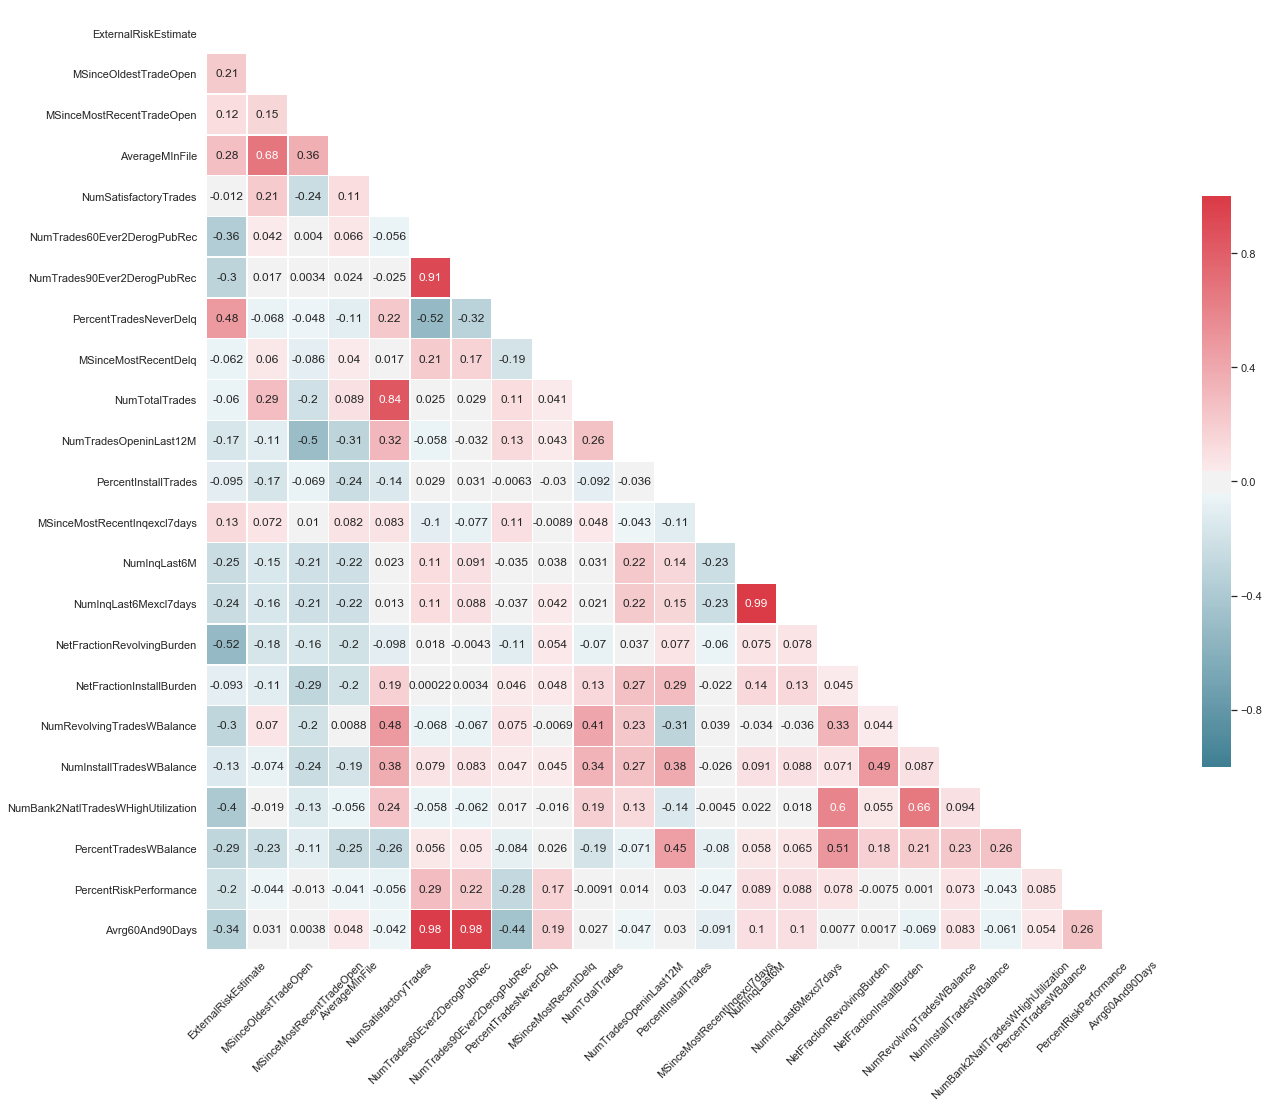

In [18]:
# # Correlation matrix using code found on https://stanford.edu/~mwaskom/software/seaborn/examples/many_pairwise_correlations.html
sns.set(style="white")

# Select columns containing continuous data
df_continuous_columns = df_train.select_dtypes(include=['int64', 'float64'])

# Drop MaxDelq2PublicRecLast12M and MaxDelqEver as eventhough of numerical nature each number is a meaning therefore 
# the features are categorical
df_continuous_columns = df_continuous_columns.drop('MaxDelq2PublicRecLast12M', 1)
df_continuous_columns = df_continuous_columns.drop('MaxDelqEver', 1)

# Calculate correlation of all pairs of continuous features
corr = continuous_columns.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(21, 21))

# Generate a custom colormap - blue and red
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, annot=True, mask=mask, cmap=cmap, vmax=1, vmin=-1,
            square=True, xticklabels=True, yticklabels=True,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)
plt.yticks(rotation = 0)
plt.xticks(rotation = 45)



- TA tanh has advised that a heat map should be obtained from all the continuous features and from them the ones with the biggest correlations should be charted with a scatter plott as creating a scatter plot matrix was not displaying correctly in jupyter notebooks due to the sheer amount of them.

- Same issue though in a much reduced manner compared to the scatter plot matrix occurrs with the heatmap. It is appreciated that the feature labels in the x-axis are not properly aligned.  

In [20]:
# Additionally Look at correlations for all the continuous features in table form.
df_continuous_columns.corr()

,ExternalRiskEstimate,MSinceOldestTradeOpen,MSinceMostRecentTradeOpen,AverageMInFile,NumSatisfactoryTrades,NumTrades60Ever2DerogPubRec,NumTrades90Ever2DerogPubRec,PercentTradesNeverDelq,MSinceMostRecentDelq,NumTotalTrades,...,NumInqLast6M,NumInqLast6Mexcl7days,NetFractionRevolvingBurden,NetFractionInstallBurden,NumRevolvingTradesWBalance,NumInstallTradesWBalance,NumBank2NatlTradesWHighUtilization,PercentTradesWBalance,PercentRiskPerformance,Avrg60And90Days
ExternalRiskEstimate,1.000000,0.213880,0.115393,0.278131,-0.012477,-0.363037,-0.304928,0.480404,-0.061629,-0.059958,...,-0.247194,-0.243921,-0.516801,-0.092782,-0.295484,-0.134056,-0.401530,-0.293962,-0.197952,-0.343538
MSinceOldestTradeOpen,0.213880,1.000000,0.151008,0.675482,0.207572,0.041963,0.017327,-0.067667,0.059720,0.287453,...,-0.154510,-0.162098,-0.176647,-0.114263,0.070408,-0.074027,-0.019367,-0.227527,-0.044047,0.031242
MSinceMostRecentTradeOpen,0.115393,0.151008,1.000000,0.362048,-0.237486,0.003976,0.003359,-0.047837,-0.085940,-0.204379,...,-0.210931,-0.214875,-0.158114,-0.291952,-0.197123,-0.242632,-0.126872,-0.112491,-0.013203,0.003771
AverageMInFile,0.278131,0.675482,0.362048,1.000000,0.111077,0.066246,0.024163,-0.105150,0.039785,0.088783,...,-0.215919,-0.218331,-0.200710,-0.198109,0.008781,-0.194227,-0.056232,-0.251206,-0.040523,0.047814
NumSatisfactoryTrades,-0.012477,0.207572,-0.237486,0.111077,1.000000,-0.055876,-0.024701,0.219347,0.016960,0.842610,...,0.023351,0.012643,-0.098265,0.186714,0.477593,0.382106,0.242674,-0.257860,-0.056258,-0.042370
NumTrades60Ever2DerogPubRec,-0.363037,0.041963,0.003976,0.066246,-0.055876,1.000000,0.914625,-0.518433,0.209433,0.025209,...,0.111607,0.109459,0.017647,0.000215,-0.068369,0.079034,-0.057770,0.055958,0.293750,0.981582
NumTrades90Ever2DerogPubRec,-0.304928,0.017327,0.003359,0.024163,-0.024701,0.914625,1.000000,-0.324288,0.166302,0.028865,...,0.090803,0.087903,-0.004299,0.003364,-0.066694,0.082981,-0.061704,0.049791,0.219074,0.975018
PercentTradesNeverDelq,0.480404,-0.067667,-0.047837,-0.105150,0.219347,-0.518433,-0.324288,1.000000,-0.194995,0.110806,...,-0.034564,-0.036911,-0.110739,0.045726,0.075425,0.046502,0.017228,-0.083930,-0.281110,-0.438062
MSinceMostRecentDelq,-0.061629,0.059720,-0.085940,0.039785,0.016960,0.209433,0.166302,-0.194995,1.000000,0.040831,...,0.037707,0.041914,0.054346,0.048323,-0.006947,0.045008,-0.016199,0.025978,0.171273,0.193644
NumTotalTrades,-0.059958,0.287453,-0.204379,0.088783,0.842610,0.025209,0.028865,0.110806,0.040831,1.000000,...,0.030598,0.020895,-0.070499,0.133452,0.406978,0.342499,0.194612,-0.191129,-0.009096,0.027490


## The features pairs that show the highest positive correlations are:

- NumInqLast6Mexcl7days with NumInqLast6M = 0.99
- Avrg60And90Days with NumTrades60Ever2DerogPubRec = 0.98
- Avrg60And90Days with NumTrades90Ever2DerogPubRec = 0.975
- NumTrades90Ever2DerogPubRec with NumTrades60Ever2DerogPubRec= 0.91
- NumTotalTrades with NumSatisfactoryTrades = 0.84
- AverageMInFile with MSinceOldestTradeOpen = 0.675


C:\Users\User\Anaconda3\envs\comp47350py37\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
C:\Users\User\Anaconda3\envs\comp47350py37\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to

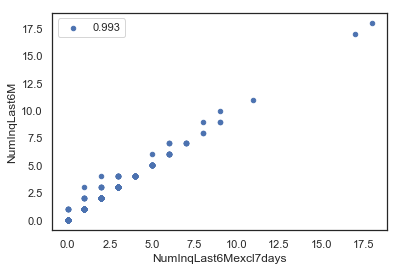

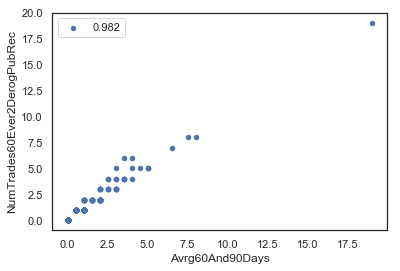

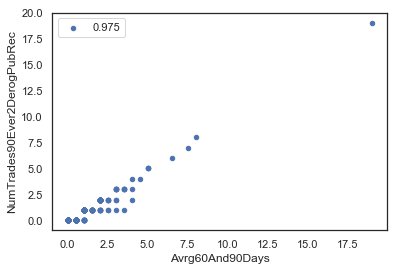

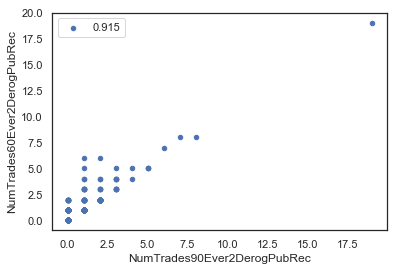

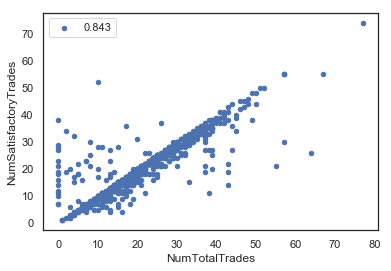

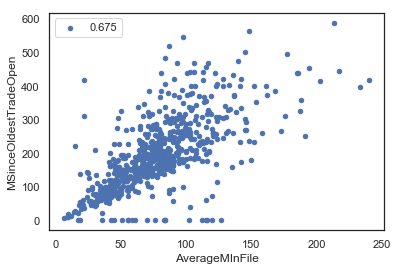

In [26]:
df_continuous_columns.plot(kind='scatter', x='NumInqLast6Mexcl7days', y='NumInqLast6M', label="%.3f" % df_continuous_columns[['NumInqLast6Mexcl7days', 'NumInqLast6M']].corr().as_matrix()[0,1])

df_continuous_columns.plot(kind='scatter', x='Avrg60And90Days', y='NumTrades60Ever2DerogPubRec', label="%.3f" % df_continuous_columns[['Avrg60And90Days', 'NumTrades60Ever2DerogPubRec']].corr().as_matrix()[0,1])

df_continuous_columns.plot(kind='scatter', x='Avrg60And90Days', y='NumTrades90Ever2DerogPubRec', label="%.3f" % df_continuous_columns[['Avrg60And90Days', 'NumTrades90Ever2DerogPubRec']].corr().as_matrix()[0,1])

df_continuous_columns.plot(kind='scatter', x='NumTrades90Ever2DerogPubRec', y='NumTrades60Ever2DerogPubRec', label="%.3f" % df_continuous_columns[['NumTrades90Ever2DerogPubRec', 'NumTrades60Ever2DerogPubRec']].corr().as_matrix()[0,1])

df_continuous_columns.plot(kind='scatter', x='NumTotalTrades', y='NumSatisfactoryTrades', label="%.3f" % df_continuous_columns[['NumTotalTrades', 'NumSatisfactoryTrades']].corr().as_matrix()[0,1])

df_continuous_columns.plot(kind='scatter', x='AverageMInFile', y='MSinceOldestTradeOpen', label="%.3f" % df_continuous_columns[['AverageMInFile', 'MSinceOldestTradeOpen']].corr().as_matrix()[0,1])
